# Assignment 2018
## Fundamentals of Data Analysis

___

Summary statistics, such as sum and mean are vey useful for describing general trends and aspects of data, but statistics alone can not fully depict any data set. There is a danger in relying only on summary statistics and ignoring the overall distribution [1]. Francis John "Frank" Anscombe (13 May 1918 – 17 October 2001), an English statistician realised this in 1973 and created several data sets, all with several identical statistical properties, to demonstrate the importance of visualizing data and also to highlight the effect that outliers (observation that lies an abnormal distance from other values in a random sample from a population) [4]can have on statistical findings of a dataset. Anscombe’s Quartet consists of four data sets, that appear to have similar summary statistics, yet when graphed the datasets tell a very different story. Each dataset consists of eleven X,Y pairs. To really understand the Dataset you must obtain the summary statistics and you must Graph the relationship of the dataset.


## Anscombe's Quartet:-


In [249]:
data = pd.read_csv('anscombe.csv')
data

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91


In [227]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(data, columns=['x1', 'x2', 'x3', 'x4','y1' ,'y2','y3' ,'y4'])

## Sum
    - The sum of each of the values in each individual column.
    - The Sum of individual X columns is 99.0 and 82.5 for y. 
    - This highlights the statistical uniformity of the data.

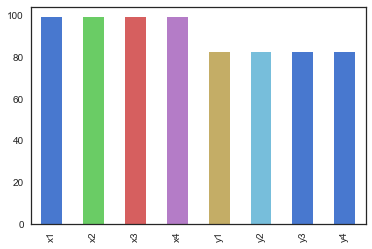

In [262]:
df.sum().plot(kind='bar')

## Mean
    - The mean is the average of the numbers. It is the sum divided by the count.
    - The mean for x columns is 9 and the mean for y columns is 7.5
    - This is further evidance of data uniformity.

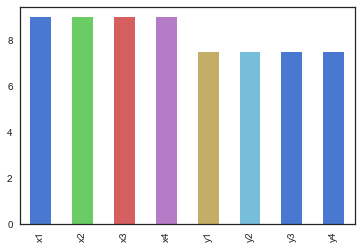

In [261]:
df.mean().plot(kind='bar')

### Variance
Another interesting statistic is Variance, which is the average distance of data points from the mean. The figures are almost the same for x and y data.
    - The Variance of the X values = 11, meaning the average distance of the X Data Points away from mean is 3.3 (Root 11).
    - The Variance of the Y values = 4.12 meaning the average distance of the Points away from mean as 2.03 (Root 4.12).
   
This statistic is misleading in relation to Anscombe's data. The only plot that resembles close relationship with the mean is Anscombe's [firstset](#Firstset)
    

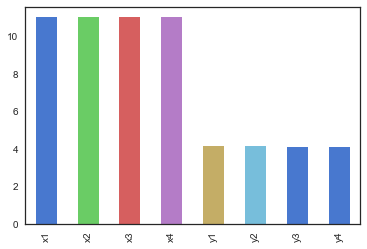

In [263]:
df.var().plot(kind='bar')

### Pearson’s Correlation Coefficient 

The Pearson correlation coefficient, r, can take a range of values from +1 to -1. A value of 0 indicates that there is no association between the two variables. A value greater than 0 indicates a positive association; that is, as the value of one variable increases, so does the value of the other variable. A value less than 0 indicates a negative association; that is, as the value of one variable increases, the value of the other variable decreases.[2]

    - calculated using df['X1'].corr(df['Y1']) 
    - The Correlation between X and Y is 0.816. This is very close to the value one (1), 
        suggesting the data is tightly bunched together around the regression line.

In [216]:
df['x1'].corr(df['y1']),df['x2'].corr(df['y2']),df['x3'].corr(df['y3']),df['x4'].corr(df['y4'])

(0.81642051634484, 0.8162365060002428, 0.8162867394895984, 0.8165214368885028)

### Linear Regression
Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data.[5]  
A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0). Statistics from linregress(df.x1,df.y1) gives slope =5 and intercept =3. The resulting line is equal to Y=3.00 + 0.500X. The data is approximately the same for all data sets. 

In [251]:
from scipy.stats import linregress
linregress(df.x1,df.y1),linregress(df.x2,df.y2),linregress(df.x3,df.y3),linregress(df.x4,df.y4),

(LinregressResult(slope=0.5000909090909091, intercept=3.0000909090909103, rvalue=0.8164205163448399, pvalue=0.00216962887307879, stderr=0.11790550059563408),
 LinregressResult(slope=0.5000000000000001, intercept=3.000909090909089, rvalue=0.816236506000243, pvalue=0.0021788162369107845, stderr=0.11796374596764074),
 LinregressResult(slope=0.4997272727272729, intercept=3.002454545454544, rvalue=0.8162867394895984, pvalue=0.002176305279228015, stderr=0.11787766222100221),
 LinregressResult(slope=0.4999090909090909, intercept=3.0017272727272726, rvalue=0.8165214368885028, pvalue=0.002164602347197222, stderr=0.11781894172968553))

## Graph of Anscombe's First Set (X1, Y1)
Using seaborn, scatterplots are produced using the regplot() function. A scatterplot can be a helpful tool in determining the strength of the relationship between two variables.[5] Anscombe's dataset 1 consists of a set of points that appear to follow a rough linear relationship with some variance. This is a suitable model for the data because the data points are close to the  regression line.

Text(0.5,1,'Anscombe Set 1')

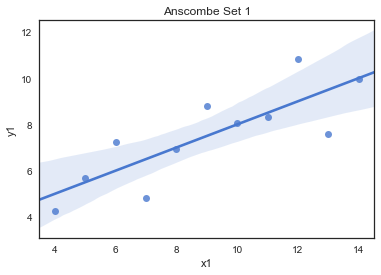

In [293]:
sns.regplot(df.x1, df.y1);     
plt.title('Anscombe Set 1') 

## Graph of Anscombe's Second Set (X2, Y2)
Anscombe's second set fits a neat curve but doesn’t follow a linear relationship, seems to fit a quadratic curve or curvelinear. Trying to fit a linear regression model to the data in this case does not provide a useful model. The Correlation coefficient as computed earlier in this notebook is 0.816, in otherwords, less than 1. Graphical representation tells a different story. 

Text(0.5,1,'Anscombe Set 2')

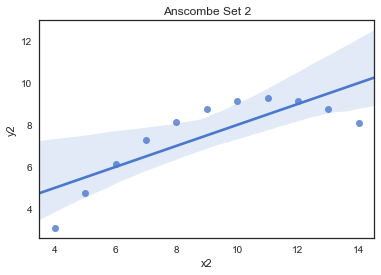

In [199]:
sns.regplot(df.x2, df.y2); 
plt.title('Anscombe Set 2')

The residplot() function [3] can be a useful tool for checking whether the simple regression model is appropriate for a dataset. It fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around y = 0: 

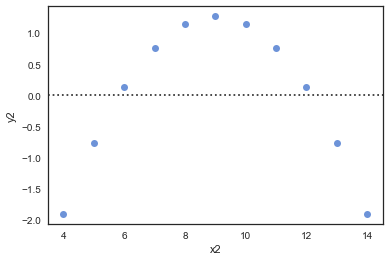

In [286]:
sns.residplot(df.x2, df.y2);

the keyword order is used to control the order of polynomial regression.

It seems like a regression of order 2 is necessary to properly capture the relationship between 'weight' and 'mpg'.

In [290]:
sns.lmplot(x="x2", y="y2", data=df, order=2, ci=None, scatter_kws={"s": 80});
# A more general regression and the corresponding coefficient of determination would be more appropriate.
plt.title('Anscombe Set 2')

TypeError: lmplot() got an unexpected keyword argument 'color'

## Graph of Anscombe's Third Set (X3, Y3)
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.[4] Dataset three looks like a tight linear relationship between x and y, except for one large outlier on the top right hand corner. After a regression line has been computed for a group of data, a point which lies far from the line (and thus has a large residual value) is known as an outlier. Such points may represent erroneous data, or may indicate a poorly fitting regression line.[5]  The distribution in this graph is linear, but should have a different regression line. Regression is offset by the one exception as shown in graph of Anscombe's third set. 

Text(0.5,1,'Anscombe Set 3')

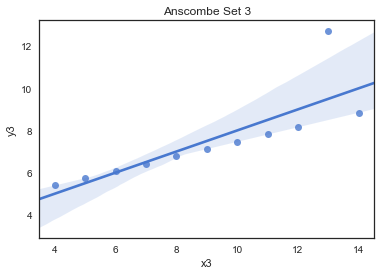

In [213]:
sns.regplot(df.x3, df.y3); 
plt.title('Anscombe Set 3')

When the dataset includes outliers or exceptions, sns.lmplot is more suitable. Parameter robust must be set to True, which means that statsmodels is used to estimate a robust regression.[6] This will de-weigh the influence of outliers. ci should be set to none. 

Text(0.5,1,'Anscombe Set 3')

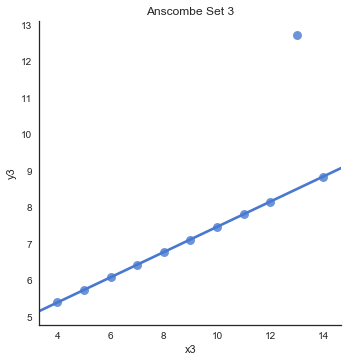

In [285]:
sns.lmplot(data=df, y='y3', x='x3', robust=True, ci=None, scatter_kws={"s": 80})
plt.title('Anscombe Set 3')

## Graph of Anscombe's Fourth Set (X4, Y4)
Dataset four looks like x remains constant, except for one outlier on the right hand side. This clearly indicates a poorly fitting regression line.[5]

Text(0.5,1,'Anscombe Set 4')

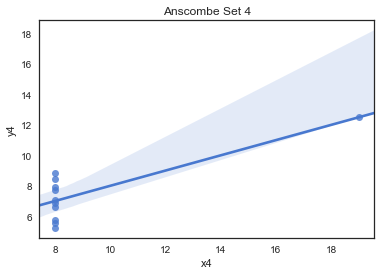

In [248]:
sns.regplot(df.x4, df.y4); 
plt.title('Anscombe Set 4')

Text(0.5,1,'Anscombe Set 4')

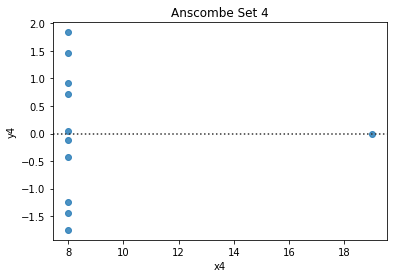

In [162]:
sns.residplot(df.x4, df.y4);
plt.title('Anscombe Set 4')

## What makes the dataset interesting?
     
The summary statistics for each of the regression models were virtually identical:
    - The Sum of individual X columns is 99.0 and 82.5 for y
    - Mean of X-axis data points:       x1, x2, x3, x4 = 9
    - Variance of X-Axis data points:      x1, x2, x3, x4 = 11
    - Mean of Y-axis data points:       y1, y2, y3, y4 = 7.50
    - Variance of Y-Axis data points:     y1, y2, y3, y4 = 4.12
    
    
The analysis process started by highlighting the similarites in sum, mean and variance values of the dataset. Next the correlation coefficient was calculated at 0.816 for all four data sets. This is very close to the value 1, so you would expect the data to be bunched together around the regression line. The regression line of Y=3.00 + 0.500X was found to represent all four datasets. All these figures together would lead you to believe that the shape of the resulting graph would be easy to predict. 

Scatter-plots reveal that only one of the data sets gives us a good model. Prior to this assignment, I would have expected to see more predictability in the graphs, given the similarity of summary statistics. The lack of data visualization can often lead to misleading conclusions and overlooked critical information, like the outliers in datasets three and four which do not stand out in summary statistics. It is important to visualize the data to get a clear picture of what’s going on. Appropriate graphs are an essential part of the data analysis process. My conclusion from this assignment is that I agree with Anscombe's assertion that it is a mistake to assume that statistical analysis of a dataset can be relied upon to accurately predicet trends and behaviour patterns. 






### References
[1] Summary statistics https://heapanalytics.com/blog/data-stories/anscombes-quartet-and-why-summary-statistics-dont-tell-the-whole-story <br/>

[2] Correlation coefficient https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php<br/>

[3] Residplot https://seaborn.pydata.org/tutorial/regression.html <br/>

[4] Outlier  https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm <br/>

[5] Linear regression http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm

[6] lmplot https://seaborn.pydata.org/generated/seaborn.lmplot.html